<a href="https://colab.research.google.com/github/OFKadi/stat/blob/main/HW1/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from numpy import pi

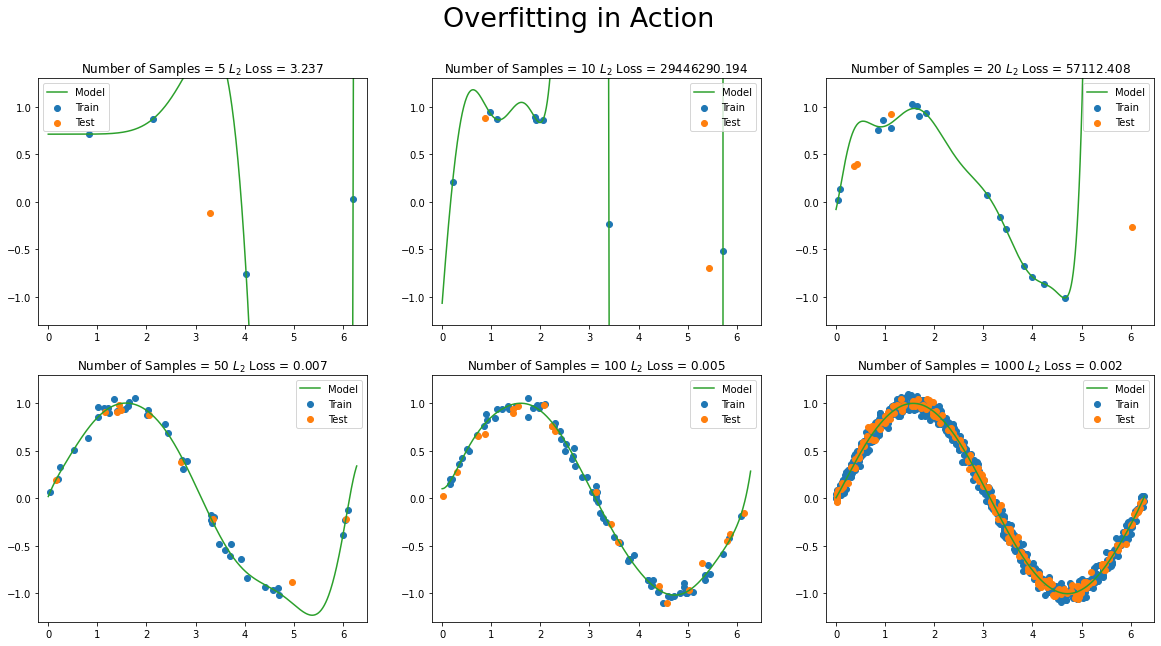

In [6]:
# Set hyperparematers
mean, std, test_size = 0, 0.05, 0.2
n = np.array([5, 10, 20, 50, 100, 1000])
degree = 10

# Figure initialization
fig, ax = plt.subplots(int(np.ceil(n.size/3)), 3, figsize=(20, 10))
ax = ax.flatten()

for i, n_i in enumerate(n):
  # Generate data
  x = 2*pi*np.random.rand(n_i, 1) 
  y = np.sin(x) + np.random.normal(mean, std, size=(n_i, 1))
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=0)

  # Make model and fit
  model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
  model.fit(X_train, Y_train)

  # Prapare data for plotting
  X_plot = np.arange(0, 2*pi, 0.01).reshape(-1, 1)
  y_pred = model.predict(X_plot)

  # Calculate loss
  loss = mean_squared_error(Y_test, model.predict(X_test))

  # Plotting
  ax[i].set_title("Number of Samples = %.d $ L_2 $ Loss = %.3f" %(n_i, loss))
  ax[i].scatter(X_train,Y_train, label="Train")
  ax[i].scatter(X_test,Y_test, label="Test")
  ax[i].plot(X_plot,y_pred, 'C2', label="Model")
  ax[i].legend(loc='best')
  ax[i].set_xlim(-0.2, 2*pi+0.2)
  ax[i].set_ylim(-1.3, 1.3)

fig.suptitle('Overfitting in Action',fontsize=27) 
plt.show()
